<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2583 non-null   datetime64[ns]
 1   Price       2583 non-null   object        
 2   Open        2583 non-null   object        
 3   High        2583 non-null   object        
 4   Low         2583 non-null   object        
 5   Date_year   2583 non-null   int32         
 6   Date_month  2583 non-null   int32         
 7   Date_day    2583 non-null   int32         
dtypes: datetime64[ns](1), int32(3), object(4)
memory usage: 131.3+ KB
None
Date          0
Price         0
Open          0
High          0
Low           0
Date_year     0
Date_month    0
Date_day      0
dtype: int64


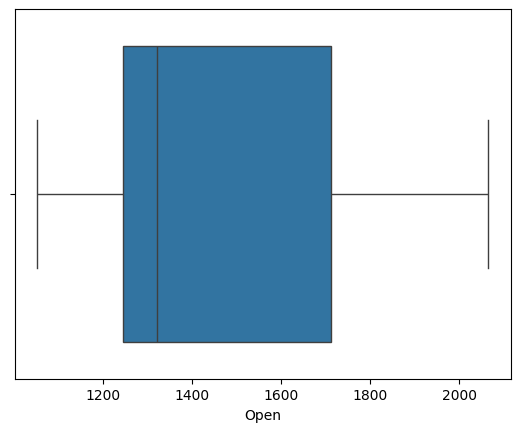

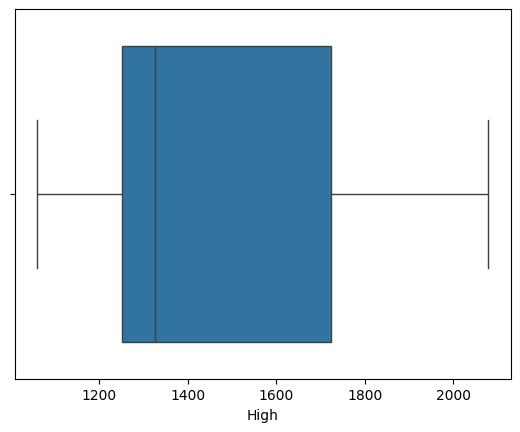

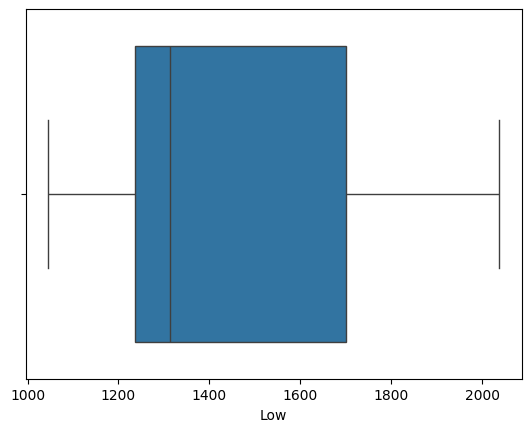

0
0
0


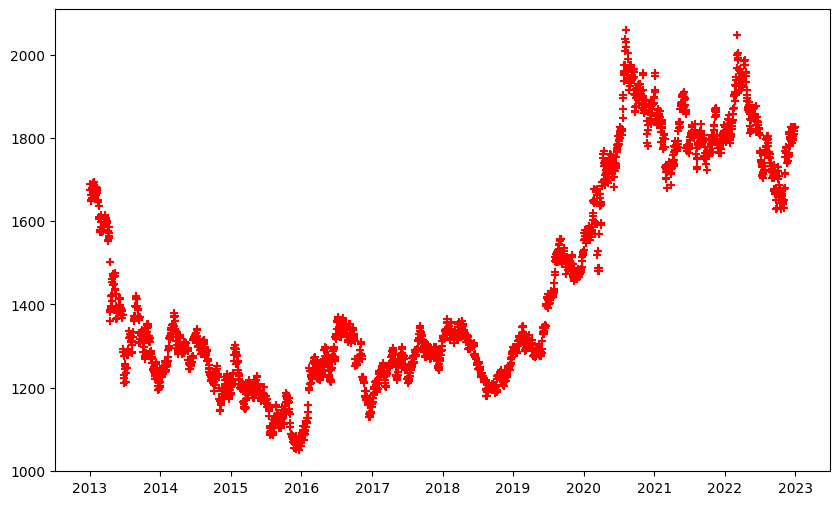

     Open    High     Low  Date_year  Date_month  Date_day
0  1675.8  1695.0  1672.1       2013           1         2
1  1688.0  1689.3  1664.3       2013           1         3
2  1664.4  1664.4  1630.0       2013           1         4
3  1657.3  1663.8  1645.3       2013           1         7
4  1651.5  1662.6  1648.8       2013           1         8
0    1689.9
1    1675.6
2    1649.9
3    1647.2
4    1663.2
Name: Price, dtype: float64
(1808, 6)
(1808,)
(775, 6)
(775,)


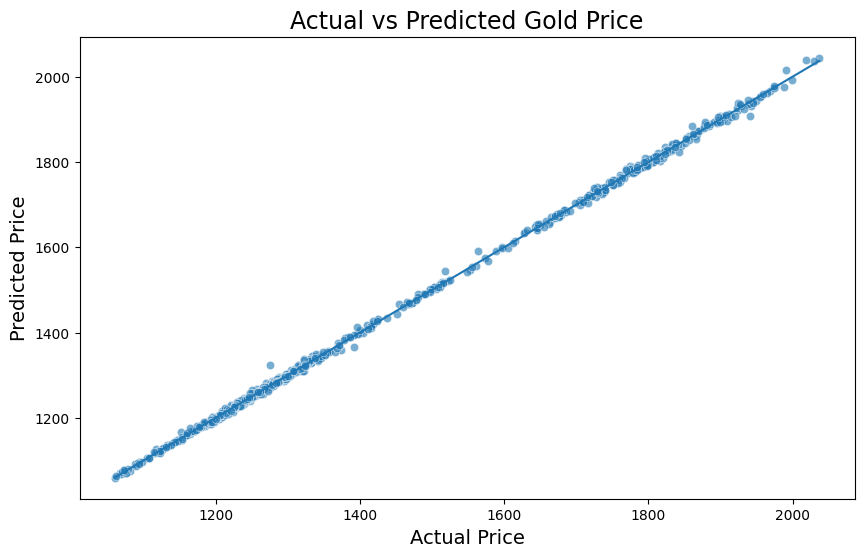

0.9995430762713717
R2:  0.9995430762713717
Mean Squared Error:  5.572162933847326
Root Mean Squared Error:  31.04899976134204
0.9992738907442129


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("Gold Price (2013-2023).csv")
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df['Date_year'] = df['Date'].dt.year
df['Date_month'] = df['Date'].dt.month
df['Date_day'] = df['Date'].dt.day

print(df.info())

columns = ["Price", "Open", "High", "Low"]
for col in columns:
    df[col] = df[col].replace({",": ""}, regex=True)
    df[col] = df[col].astype("float64")

print(df.isna().sum())

sns.boxplot(x=df["Open"])
plt.show()
sns.boxplot(x=df["High"])
plt.show()
sns.boxplot(x=df["Low"])
plt.show()

columns = ["Open", "High", "Low"]
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(len(df[(df[col] > upper_bound) | (df[col] < lower_bound)]))

    df = df[(df[col] <= upper_bound) & (df[col] >= lower_bound)]

fig = plt.figure(figsize=(10, 6))
plt.scatter(y=df["Price"], x=df["Date"], color='red', marker='+')
plt.show()

col = df.columns.drop(['Price', 'Date'])
x = df[col]
y = df["Price"]

print(x.head())
print(y.head())

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.30)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)

plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Actual vs Predicted Gold Price', fontsize=17)
plt.show()

print(linreg.score(X_test, y_test))
print("R2: ", r2_score(y_test, y_pred))
print("Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean Squared Error: ", mean_squared_error(y_test, y_pred))

rando = RandomForestRegressor()
rando.fit(X_train, y_train)

print(rando.score(X_test, y_test))
